In [15]:
import cv2
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import os


In [16]:
# Specify the path to the data folder containing the images
data_folder = r"C:\Users\Nagham\HRNet-Human-Pose-Estimation\data\hr-lspet1"  # Replace with the actual path to your image folder

In [17]:
# Load the annotation file
#annotations = scipy.io.loadmat(r"C:\Users\Nagham\HRNet-Human-Pose-Estimation\data\hr-lspet\joints.mat")
# Load the MATLAB file
annotations = scipy.io.loadmat(os.path.join(data_folder, 'joints.mat'))
joints = annotations['joints']  # Shape will be (3, 14, N), where N is the number of images

In [18]:
# Example: Extract keypoints for the first image
keypoints_first_image = joints[:, :, -1]  # Extract x and y coordinates and transpose to get shape (14, 2)
print("Keypoints for the first image:\n", keypoints_first_image)

Keypoints for the first image:
 [[217 101   1]
 [163 129   1]
 [139 109   1]
 [127  76   1]
 [179  61   1]
 [233  50   1]
 [133 214   0]
 [109 170   1]
 [ 80 150   1]
 [ 48  92   1]
 [ 67  70   1]
 [ 86  71   1]
 [ 64 152   1]
 [ 27 148   1]]


In [25]:
# Specify the image index x
image_index = 4056  # Replace with the index of the image you want to extract keypoints for

# Extract keypoints for the specified image index
keypoints = joints[:, :, image_index]

# Prepare a list to store tuples of (x, y) coordinates
keypoint_tuples = []

# Loop through each keypoint and extract (x, y) coordinates
for i in range(keypoints.shape[0]):
    x = keypoints[i, 0]
    y = keypoints[i, 1]
    # Optionally, include visibility if needed
    # visibility = keypoints[i, 2]
    
    keypoint_tuples.append((int(x), int(y)))  # Convert to int if needed

# Display the extracted keypoints as tuples
print("Keypoint Tuples:")
print(keypoint_tuples)

Keypoint Tuples:
[(280, 41), (269, 63), (252, 68), (253, 72), (292, 57), (329, 23), (89, 200), (122, 170), (141, 137), (181, 124), (170, 150), (139, 182), (149, 138), (125, 105)]


In [ ]:
# Load your image
image_path = r"C:\Users\Nagham\HRNet-Human-Pose-Estimation\data\hr-lspet1\im00001.png"
image = cv2.imread(image_path)

# Ensure the image is loaded properly
if image is None:
    raise ValueError("Image not loaded. Check the path and file name: " + image_path)

# Convert the image from BGR to RGB (OpenCV loads images in BGR format)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image using Matplotlib
#plt.imshow(image_rgb)
plt.title("Image with Matplotlib")
plt.axis('off')  # Hide axes
plt.show()

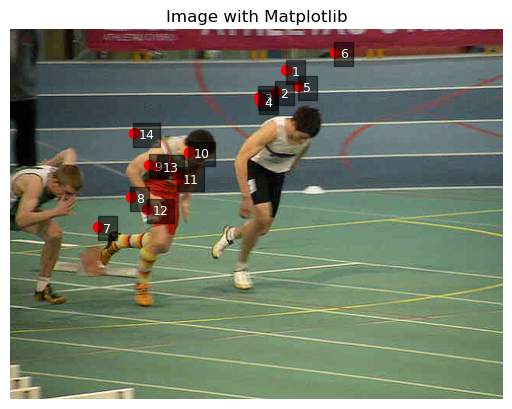

In [26]:
# Load your image
image_path = r"C:\Users\Nagham\HRNet-Human-Pose-Estimation\data\hr-lspet1\im04056.png"
image = cv2.imread(image_path)

# Ensure the image is loaded properly
if image is None:
    raise ValueError("Image not loaded. Check the path and file name: " + image_path)

# Convert the image from BGR to RGB (OpenCV loads images in BGR format)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image using Matplotlib
plt.imshow(image_rgb)
plt.title("Image with Matplotlib")

# Draw keypoints on the image with labels
for i, point in enumerate(keypoint_tuples, start=1):
    plt.scatter(point[0], point[1], s=50, c='red', marker='o')
    plt.text(point[0] + 5, point[1] + 5, str(i), fontsize=9, color='white', bbox=dict(facecolor='black', alpha=0.5))

# Hide axes
plt.axis('off')

# Show the final image with keypoints
plt.show()
